In [1]:
import tkinter as tk
from tkinter import ttk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import random

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
price_df = pd.read_csv('server stuff/price_tracker_Manawatu_1.226737014.csv')

In [3]:
price_df.columns

Index(['Unnamed: 0', 'box', 'raceid', 'date', 'racetime', 'dogid',
       'dog_hidden', 'dog_last_run_date', 'relu_sum', 'conf', 'dogs', 'doglsp',
       'pred_logit', 'pred_price', 'tab_track', 'Model Name', 'market_id',
       'selection_id', 'vol', 'ltp', 'atl', 'atb', 'bfsp', 'bet_amount',
       'seconds'],
      dtype='object')

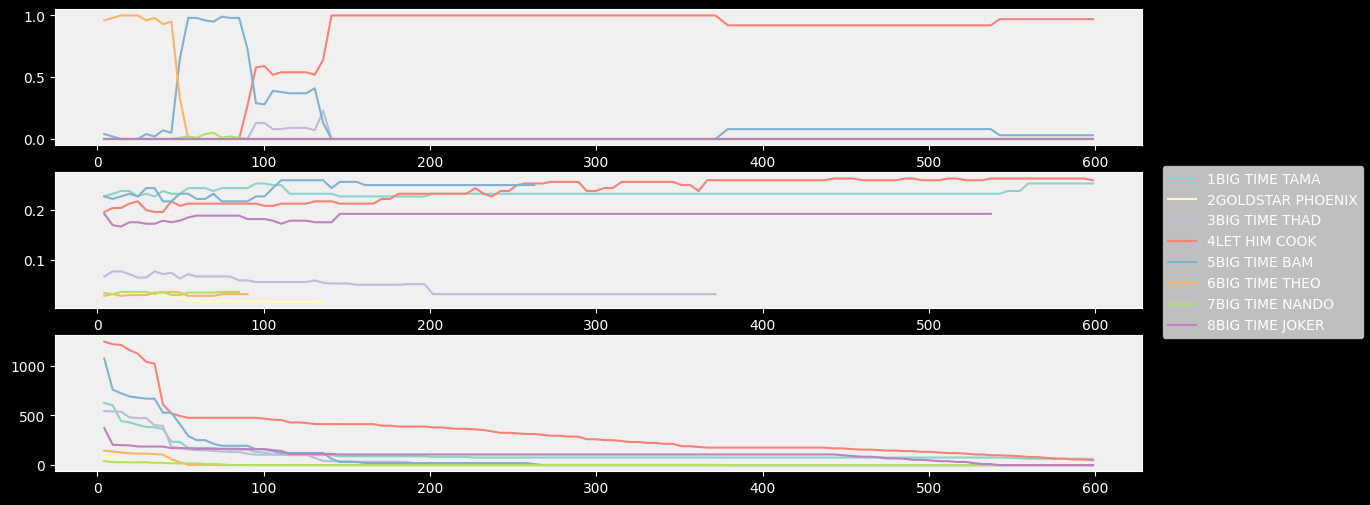

In [14]:
import matplotlib.pyplot as plt

# Use the provided dataframe
df = price_df

# Create a new figure with two subplots
fig, axs = plt.subplots(3, figsize=(15, 6))

# Get the unique dog IDs
df['select'] = df['box'].astype(str) + df['dogs']
dog_ids = df['select'].unique()

# Sort the data by seconds and box in descending order
df = df.sort_values(by=['seconds', 'box'], ascending=False)
df = df.sort_values(by=['seconds', 'box'], ascending=[False,True])

# Plot the bet_amount data for each dog in the first subplot
lines = []  # Store the Line2D objects for the legend
labels = []  # Store the labels for the legend
for dog_id in dog_ids:
    dog_data = df[df['select'] == dog_id]
    line, = axs[0].plot(dog_data['seconds'], dog_data['bet_amount'])
    lines.append(line)
    labels.append(dog_id)

# Plot the atb data for each dog in the second subplot
for dog_id in dog_ids:
    dog_data = df[df['select'] == dog_id]
    axs[1].plot(dog_data['seconds'], 1/dog_data['ltp'])

for dog_id in dog_ids:
    dog_data = df[df['select'] == dog_id]
    axs[2].plot(dog_data['seconds'], dog_data['vol'])

# Create a shared legend to the right of the chart
fig.legend(lines, labels, loc='center right')

# Adjust the layout to make room for the legend
plt.subplots_adjust(right=0.85)

# Show the plot
plt.show()

In [5]:
df = df.sort_values(by=['seconds', 'box'], ascending=[False,True])
df

,Unnamed: 0,box,raceid,date,racetime,dogid,dog_hidden,dog_last_run_date,relu_sum,conf,...,market_id,selection_id,vol,ltp,atl,atb,bfsp,bet_amount,seconds,select
0,0,1,1011249002,2024-03-28,2024-03-28 14:08:00,782101734,1,2024-03-22,0.406425,0.283284,...,1.226737,66580766,64.35,3.95,4.8,3.9,3.95,0.00,598.502,1BIG TIME TAMA
1,1,2,1011249002,2024-03-28,2024-03-28 14:08:00,609359833,1,2024-03-22,0.406425,0.020075,...,1.226737,44682336,0.00,0.00,200.0,18.5,0.00,0.00,598.502,2GOLDSTAR PHOENIX
2,2,3,1011249002,2024-03-28,2024-03-28 14:08:00,782171297,1,2024-03-19,0.406425,0.036941,...,1.226737,53373225,0.00,0.00,32.0,15.0,0.00,0.00,598.502,3BIG TIME THAD
3,3,4,1011249002,2024-03-28,2024-03-28 14:08:00,782171261,1,2024-03-15,0.406425,0.157997,...,1.226737,62220390,49.46,3.85,3.9,3.7,3.85,0.97,598.502,4LET HIM COOK
4,4,5,1011249002,2024-03-28,2024-03-28 14:08:00,782101739,1,2024-03-19,0.406425,0.109738,...,1.226737,66544593,0.00,0.00,5.1,3.7,0.00,0.03,598.502,5BIG TIME BAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,3,4,1011249002,2024-03-28,2024-03-28 14:08:00,782171261,1,2024-03-15,0.406425,0.157997,...,1.226737,62220390,1243.37,5.10,5.1,4.9,5.10,0.00,4.137,4LET HIM COOK
900,4,5,1011249002,2024-03-28,2024-03-28 14:08:00,782101739,1,2024-03-19,0.406425,0.109738,...,1.226737,66544593,1072.28,4.40,4.4,4.2,4.40,0.04,4.137,5BIG TIME BAM
901,5,6,1011249002,2024-03-28,2024-03-28 14:08:00,782171969,1,2024-03-22,0.406425,0.153184,...,1.226737,67532414,144.15,36.00,36.0,32.0,36.00,0.96,4.137,6BIG TIME THEO
902,6,7,1011249002,2024-03-28,2024-03-28 14:08:00,782101659,1,2024-03-19,0.406425,0.053812,...,1.226737,63552573,39.71,30.00,32.0,27.0,30.00,0.00,4.137,7BIG TIME NANDO


In [13]:
import tkinter as tk
from tkinter import ttk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Set the style parameters
mpl.rcParams['axes.facecolor'] = '#F0F0F0'  # Light grey
mpl.rcParams['grid.color'] = 'grey'
mpl.rcParams['grid.linestyle'] = '-'
mpl.rcParams['grid.linewidth'] = 0.5
# Use the provided dataframe
df = price_df
max_seconds = df['seconds'].max().round(0)
# Get the unique dog IDs
df['select'] = df['box'].astype(str) + df['dogs']
dog_ids = df['select'].unique()

# Sort the data by seconds and box in descending order
df = df.sort_values(by=['seconds', 'box'], ascending=False)
df = df.sort_values(by=['seconds', 'box'], ascending=[False,True])
# Group the data by the seconds column
df['atb'] = 1/df['atb']
grouped = df.groupby('seconds', sort=False)

# Create an iterator over the groups
group_iterator = iter(grouped)

# Create a new window
window = tk.Tk()
window.geometry("1400x1000")
# Create a figure with two subplots
fig = Figure(figsize=(12, 6), dpi=100)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Create a canvas and add the figure to it
canvas = FigureCanvasTkAgg(fig, master=window)
canvas.draw()
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Create a treeview widget
tree = ttk.Treeview(window)

# Define the columns
tree["columns"] = ("dog", "price", "model_output")

# Format the columns
tree.column("#0", width=0, stretch=tk.NO)
tree.column("dog", anchor=tk.W, width=100)
tree.column("price", anchor=tk.W, width=100)
tree.column("model_output", anchor=tk.W, width=100)

# Create the column headings
tree.heading("#0", text="", anchor=tk.W)
tree.heading("dog", text="Dog", anchor=tk.W)
tree.heading("price", text="Price", anchor=tk.W)
tree.heading("model_output", text="Model Output", anchor=tk.W)

# Add the treeview to the window
tree.pack()

# Define the colours for each box
box_colours = {
    '1': '#E6194B',  # Red
    '2': '#3CB44B',  # Green
    '3': '#FFE119',  # Yellow
    '4': '#4363D8',  # Blue
    '5': '#F58231',  # Orange
    '6': '#911EB4',  # Purple
    '7': '#42D4F4',  # Cyan
    '8': '#F032E6'   # Magenta
}
# Create lists to store the data points for each dog
data_points = {dog_id: {'seconds': [], 'bet_amount': [], 'atb': []} for dog_id in dog_ids}

# Function to add data to the treeview and update the charts
def add_data():
    try:
        # Get the next group
        seconds, group = next(group_iterator)
    except StopIteration:
        # No more groups
        return

    # Clear the treeview
    tree.delete(*tree.get_children())

    # Add data from the group to the treeview and the data points
    for index, row in group.iterrows():
        tree.insert(parent='', index='end', iid=index, text="", values=(row['select'], row['bet_amount'], row['atb']))
        data_points[row['select']]['seconds'].append(row['seconds'])
        data_points[row['select']]['bet_amount'].append(row['bet_amount'])
        data_points[row['select']]['atb'].append(row['atb'])

    

    # Rest of your code

    # Update the charts
    ax1.clear()
    ax2.clear()
    lines = []  # Store the Line2D objects for the legend
    labels = []  # Store the labels for the legend
    for dog_id, data in data_points.items():
        box_number = dog_id[0]
        colour = box_colours[box_number]
        line, = ax1.plot(data['seconds'], data['bet_amount'], color=colour)
        ax2.plot(data['seconds'], data['atb'])
        lines.append(line)
        labels.append(dog_id)
    legend = fig.legend(lines, labels, loc='center right', bbox_to_anchor=(0.95, 0.5))
    for text in legend.get_texts():
        text.set_color('black')
    fig.subplots_adjust(right=0.75)  # Adjust the right margin

    # Set the x-axis limits
    ax1.set_xlim(max_seconds, -20)
    ax1.set_ylim(0,1.1)
    ax2.set_xlim(max_seconds, -20)
    ax2.set_ylim(0,1.1)
    # Set the x-axis ticks every 10 units
    # ax1.set_xticks(np.arange(max_seconds, -20, -10))
    # ax2.set_xticks(np.arange(max_seconds, -20, -10))

    # Set the y-axis ticks every 0.25 units
    # ax1.set_yticks(np.arange(0, max(df['bet_amount']), 0.25))
    # ax2.set_yticks(np.arange(0, min(max(df['atb']), 100), 0.25))

    # Set the y-axis minor ticks every 0.125 units
    ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.125))
    ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.125))

    # Enable the grid
    ax1.grid(True)
    ax2.grid(True)

    canvas.draw()

    # Rest of your code
    # Schedule this function to be called again in 1 second
    window.after(10, add_data)

# Start adding data
add_data()

# Start the Tkinter event loop
window.mainloop()